In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from definitions import ROOT_DIR

from grader.src.api.functions import *
from grader.src.cfggenerator.cfggenerator import PythonCfgGenerator
from grader.src.ged.utils.graph_collapser import uncollapse, collapse, propagate_branching

ROOT_SAMPLE = os.path.join(ROOT_DIR, 'datasets')

def get_path(path):
    return os.path.join(ROOT_SAMPLE, path)

def get_file_content(filename):
    filename = get_path(filename)
    with open(filename, 'r', encoding='UTF-8') as file:
        content = file.read()
        return content

python_cfg_generator = PythonCfgGenerator()
content = get_file_content(os.path.join('test', 'control-flow-sample.py'))
# content = get_file_content(os.path.join('test', 'sample2.py'))
# content = get_file_content(os.path.join('test', 'sample1.py'))
print(f'Source Code:\n-------------------\n{content}\n-------------------\n')
cfg = python_cfg_generator.generate_python(content)

Source Code:
-------------------
square = int(input())
low = 0
high = square
root = 'i'
while (low < high):
    mid = low + (high - high) // 2
    if mid * mid <= square:
        root = mid
        low = mid + 1
    else:
        high = mid - 1
print(f"Integer square root of {square} is {root}")

-------------------



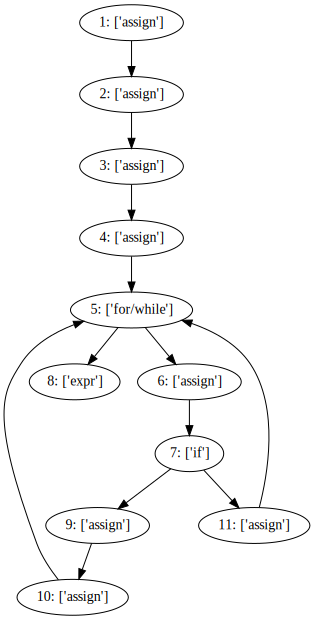

In [2]:
display(graph_to_digraph(uncollapse(cfg), 'label'))

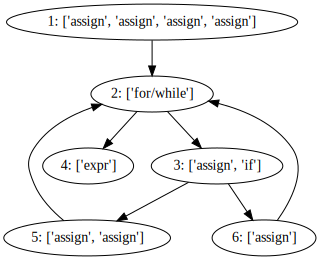

In [3]:
display(graph_to_digraph(collapse(cfg), 'label'))

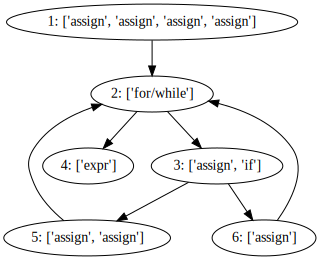

In [4]:
display(graph_to_digraph(propagate_branching(cfg), 'label'))

In [5]:
# from testing.src.sendjaja import Sendjaja

# sendjaja_cfg1 = Sendjaja.create_sendjaja_graph(get_file_content(os.path.join('test', 'source1.py')))
# print(sendjaja_cfg1)
# sendjaja_cfg2 = Sendjaja.create_sendjaja_graph(get_file_content(os.path.join('test', 'reference1.py')))
# print(sendjaja_cfg2)
# result = Sendjaja.compare(sendjaja_cfg1, sendjaja_cfg2, lower_bound=None)
# print(result)